In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyextremes import EVA

print("Todos los paquetes importados correctamente")


Todos los paquetes importados correctamente


In [46]:
station = 1330
# We create some random continuous time series with some extremes
flowdata = pd.read_csv(f"../../../Status_Outlook_Bulletin/stations/data/{station}.csv",parse_dates=['Fecha'],index_col="Fecha",dayfirst=True,na_values="NA")
# Convertir el índice a datetime por si acaso
flowdata.index = pd.to_datetime(flowdata.index, dayfirst=True)
diff = pd.date_range(start = flowdata.index[0].strftime('%Y-%m-%d'), end = flowdata.index[-1].strftime('%Y-%m-%d'),freq='D')
# Re-index the dataframe based on the missind date variable
flowdata = flowdata.reindex(diff,fill_value=None)
# Set index Fecha
flowdata.index.name = 'Fecha'
flowdata = flowdata.rename_axis("date")
# Change columns names
flowdata.columns = ['flow']

#month and year column
flowdata['month'] = flowdata.index.month
flowdata['year'] = flowdata.index.year
flowdata = flowdata.reset_index()

#check whether or not there is enough data? 
print(station)
print(f"There are {flowdata['year'].max() - flowdata['year'].min()} years of data in this file.")
print(f"There are {sum(flowdata['flow'].isnull())} missing data points, which is {np.round(sum(flowdata['flow'].isnull())/len(flowdata) * 100,2)}% of the total data")

1330
There are 45 years of data in this file.
There are 1427 missing data points, which is 8.6% of the total data


In [47]:
flowdata.set_index('date', inplace=True)
# Create a time series (removing missing values in 'flow' column)
flowdata_ts = flowdata['flow'].dropna()
# Display the result
print(flowdata_ts)

date
1980-01-01     1.956
1980-01-02     1.956
1980-01-03     1.956
1980-01-04     1.956
1980-01-05     1.956
               ...  
2025-05-27    12.367
2025-05-28    12.106
2025-05-29    22.766
2025-05-30    63.905
2025-05-31    76.053
Name: flow, Length: 15161, dtype: float64


In [48]:
from pyextremes import get_extremes
extremes = get_extremes(
    ts=flowdata_ts,
    method="BM",
    block_size="365.2425D",
)
extremes.sort_values(ascending=False).head(6)

date
2024-03-22    3938.472
2019-06-18    3337.963
2016-04-19    2719.056
1983-09-29    2625.998
1986-08-10    2601.422
2017-08-28    2492.022
Name: flow, dtype: float64

In [49]:
model = EVA(flowdata_ts)

In [50]:
model.get_extremes(method="BM", block_size="365.2425D")

In [51]:
model.plot_extremes()

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot: xlabel='date', ylabel='flow'>)

In [52]:
model.fit_model()
summary = model.get_summary(
    return_period=[2, 5, 10, 20, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value     lower ci     upper ci
return period                                        
2.0             1367.252542  1150.127518  1592.071282
5.0             2124.454536  1820.605577  2424.993395
10.0            2625.788143  2247.066980  3005.019949
20.0            3106.679375  2631.644170  3562.466623
25.0            3259.224484  2755.821253  3746.333437
50.0            3729.143748  3130.343869  4281.240405
100.0           4195.593201  3493.472110  4812.715933
250.0           4809.750156  3979.419966  5541.074897
500.0           5273.486680  4341.825789  6077.284276
1000.0          5736.887916  4713.294957  6619.737215


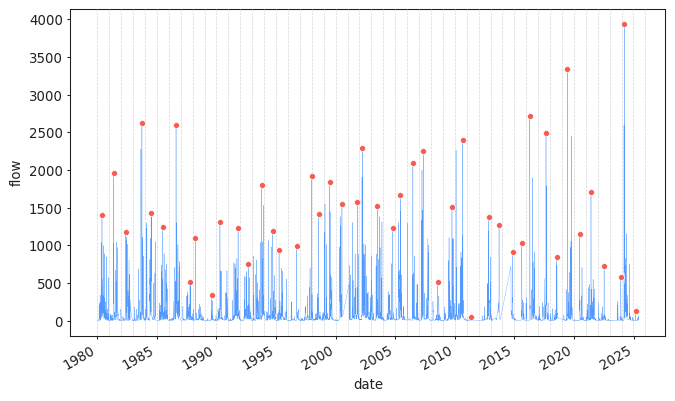

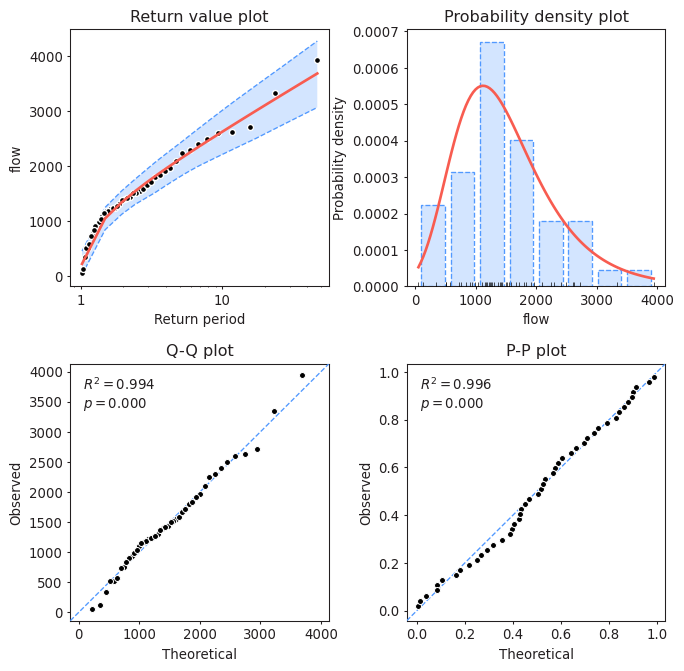

In [53]:
model.plot_diagnostic(alpha=0.95);
plt.show()

In [54]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          flow      Size:                              15,161
Start:                       January 1980      End:                             May 2025
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 46      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

In [55]:
from pyextremes import get_return_periods

return_periods = get_return_periods(
    ts=flowdata_ts,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="Cunnane",        # other option: "weibull" "Cunnane", "median", "Gringorten"
)
return_periods.sort_values("return period", ascending=False).head(12).round(2)

,flow,exceedance probability,return period
date,,,
2024-03-22,3938.47,0.01,77.00
2019-06-18,3337.96,0.03,28.88
2016-04-19,2719.06,0.06,17.77
1983-09-29,2626.00,0.08,12.83
1986-08-10,2601.42,0.10,10.04
2017-08-28,2492.02,0.12,8.25
2010-09-04,2400.88,0.14,7.00
2002-04-01,2297.52,0.16,6.08
2007-05-08,2247.47,0.19,5.37
